**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

## Análisis Exploratorio y Curacion de datos

Grupo 15:


*   Fassi, Carolina Noelia.
*   Fassi, Angel Maximiliano.

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')
seaborn.set_context('talk')

In [4]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv('merged_price_df.csv')
melb_df[:3]

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,3,h,850000.0,3067.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,4,h,1600000.0,3067.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [5]:
categorical_cols = ['Type',"Regionname"]
numerical_cols = ['Rooms', "Bathroom", "Car"]

In [6]:
melb_df[categorical_cols].nunique()

Type          3
Regionname    8
dtype: int64

In [7]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type          0
Regionname    0
dtype: int64

In [8]:
#Aplicamos One Hot Encoder a las variables categoricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[categorical_cols])

encoded_types = encoder.transform(melb_df[categorical_cols])

encoded_data = pd.DataFrame(encoded_types, index=melb_df.index) #creamos un DataFrame
encoded_data.columns = encoder.get_feature_names()

df_encoding = pd.concat([melb_df, encoded_data], axis=1) #agregamos el nuevo al original
df_encoding.sample(5)

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria
485,Balwyn North,7,h,1350000.0,3104.0,2.0,0.0,942.0,NaN,NaN,Southern Metropolitan,3104.0,97.268293,41.0,1118.000000,4063.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2978,Ivanhoe,3,h,1102000.0,3079.0,1.0,1.0,597.0,115.0,1950.0,Eastern Metropolitan,3079.0,125.473684,38.0,514.900000,1875.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,Bentleigh East,5,h,1220000.0,3165.0,2.0,2.0,611.0,188.0,1950.0,Southern Metropolitan,3165.0,113.039216,51.0,563.200000,2032.800000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10433,Bentleigh,2,u,410000.0,3204.0,1.0,1.0,834.0,75.0,1967.0,Southern Metropolitan,3204.0,114.612500,80.0,719.222222,2936.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5881,Yarraville,3,h,1035000.0,3013.0,1.0,2.0,289.0,NaN,NaN,Western Metropolitan,3013.0,135.609756,82.0,923.571429,2966.090909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#Aplicamos One Hot Encoder a las variables numericas
encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[numerical_cols])

encoded_types_2 = encoder.transform(melb_df[numerical_cols])

encoded_data_2 = pd.DataFrame(encoded_types_2, index=encoded_data.index) #creamos un DataFrame
encoded_data_2.columns = encoder.get_feature_names()

df_encoding2 = pd.concat([df_encoding, encoded_data_2], axis=1)
df_encoding2.sample(5)

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
8645,Oak Park,2,t,790000.0,3046.0,2.0,1.0,208.000000,127.00,2010.0,Northern Metropolitan,3046.0,69.033333,60.0,351.0,1076.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3746,Niddrie,2,u,457000.0,3042.0,1.0,1.0,465.662162,89.00,1975.0,Western Metropolitan,3042.0,81.571429,35.0,568.2,1800.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10636,Springvale,2,u,580000.0,3171.0,2.0,2.0,155.000000,89.25,NaN,South-Eastern Metropolitan,3171.0,67.857143,21.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,Balwyn North,3,h,1830000.0,3104.0,2.0,2.0,493.000000,NaN,NaN,Southern Metropolitan,3104.0,97.268293,41.0,1118.0,4063.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7694,Middle Park,3,h,1420000.0,3206.0,1.0,0.0,112.000000,NaN,NaN,Southern Metropolitan,3206.0,229.418033,122.0,1187.4,3734.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Quitamos las columnas de las variables originales.
#Tambien quitamos la variable Suburb, debido a que no le realizaremos el One Hot Encoding ya que es una variable con 312 valores unicos, lo que resultaria en demasiadas columnas que consumirian toda la memoria RAM disponible en G. Colab  .
df_encoding3=df_encoding2.drop(['Rooms', "Bathroom", "Car", 'Type',"Regionname", "Suburb"], axis=1)
df_encoding3[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,1480000.0,3067.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,850000.0,3067.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1600000.0,3067.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,941000.0,3067.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1876000.0,3067.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_encoding3.copy(deep=True)

#Primero imputamos solo las variables YearBuilt y BuildingArea 
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])
melb_data_mice.sample(5)

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
9208,680000.0,3131.0,189.000000,73.00,2001.0,3131.0,112.592593,27.0,465.200000,1975.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7482,830000.0,3020.0,608.000000,104.08,1971.0,3020.0,69.555556,45.0,160.000000,600.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7574,550000.0,3016.0,465.662162,65.00,1990.0,3016.0,191.094595,74.0,612.250000,2119.750000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11591,1915000.0,3191.0,563.000000,220.00,1910.0,3191.0,195.720000,50.0,1118.700000,4375.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5106,320000.0,3182.0,465.662162,91.80,2013.0,3182.0,147.729515,1135.0,1051.441026,3847.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Verificamos que en las variables imputadas no hay presencia de NaN.
melb_data_mice.isna().sum()

Price                               0
Postcode                            0
Landsize                            0
BuildingArea                        0
YearBuilt                           0
zipcode                            21
airbnb_price_mean                  21
airbnb_record_count                21
airbnb_weekly_price_mean          866
airbnb_monthly_price_mean        1252
x0_h                                0
x0_t                                0
x0_u                                0
x1_Eastern Metropolitan             0
x1_Eastern Victoria                 0
x1_Northern Metropolitan            0
x1_Northern Victoria                0
x1_South-Eastern Metropolitan       0
x1_Southern Metropolitan            0
x1_Western Metropolitan             0
x1_Western Victoria                 0
x0_1                                0
x0_2                                0
x0_3                                0
x0_4                                0
x0_5                                0
x0_6        

In [13]:
#Escalamos el DF completo del ejercicio anterior usando MinMaxScaler para asegurarnos de que todas las variables tengan las mismas unidades y ninguna tenga mas peso.
#Para luego imputar las variables con NaN y poder comparar los resultados de las imputaciones con la realizada anteriormente.

df_encoding4=df_encoding3.copy()

from sklearn.preprocessing import MinMaxScaler
melb_df2_2=df_encoding3.copy()
melb_df3=df_encoding4
scaler=MinMaxScaler()
for col in melb_df2_2:
    sp=scaler.fit(melb_df2_2[col].values.reshape(-1,1))
    melb_df3[col] = scaler.transform(melb_df2_2[col].values.reshape(-1,1))
melb_df3[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,0.632653,0.068577,0.020433,NaN,NaN,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.346939,0.068577,0.009454,NaN,NaN,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.388209,0.068577,0.018298,NaN,NaN,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Imputamos las variables YearBuilt y BuildingArea pero con los datos ya escalados.

melb_data_mice_ESC = melb_df3.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice_ESC[['YearBuilt', 'BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice_ESC[['YearBuilt', 'BuildingArea']])
melb_data_mice_ESC[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,0.632653,0.068577,0.020433,0.136341,0.408621,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.346939,0.068577,0.009454,0.136341,0.408621,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.388209,0.068577,0.018298,0.136341,0.408621,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#En este paso imputamos todo el Df, incluyendo las variables categoricas, primero SIN ESCALADO

melb_data_mice_COMPLETA = df_encoding3.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
arr_df = mice_imputer.fit_transform(melb_data_mice_COMPLETA)
df_with_all = pd.DataFrame(arr_df, columns=melb_data_mice_COMPLETA.columns)
df_with_all[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,1480000.0,3067.0,202.0,184.0,1955.8,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,850000.0,3067.0,94.0,130.0,1954.4,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1600000.0,3067.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,941000.0,3067.0,181.0,145.6,1977.6,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1876000.0,3067.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Imputamos todo el Df, incluyendo las variables categoricas, pero primero habiendo realizado el escalado de los datos
melb_data_mice_COMPLETA = melb_df3.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
arr_df = mice_imputer.fit_transform(melb_data_mice_COMPLETA)
df_with_all_2= pd.DataFrame(arr_df, columns=melb_data_mice_COMPLETA.columns)
df_with_all_2[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,0.632653,0.068577,0.020433,0.107181,0.146552,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.346939,0.068577,0.009454,0.185209,0.563793,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.388209,0.068577,0.018298,0.114191,0.293103,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparamos graficamente los resultados de las distintas imputaciones con los datos escalados y sin escalar:

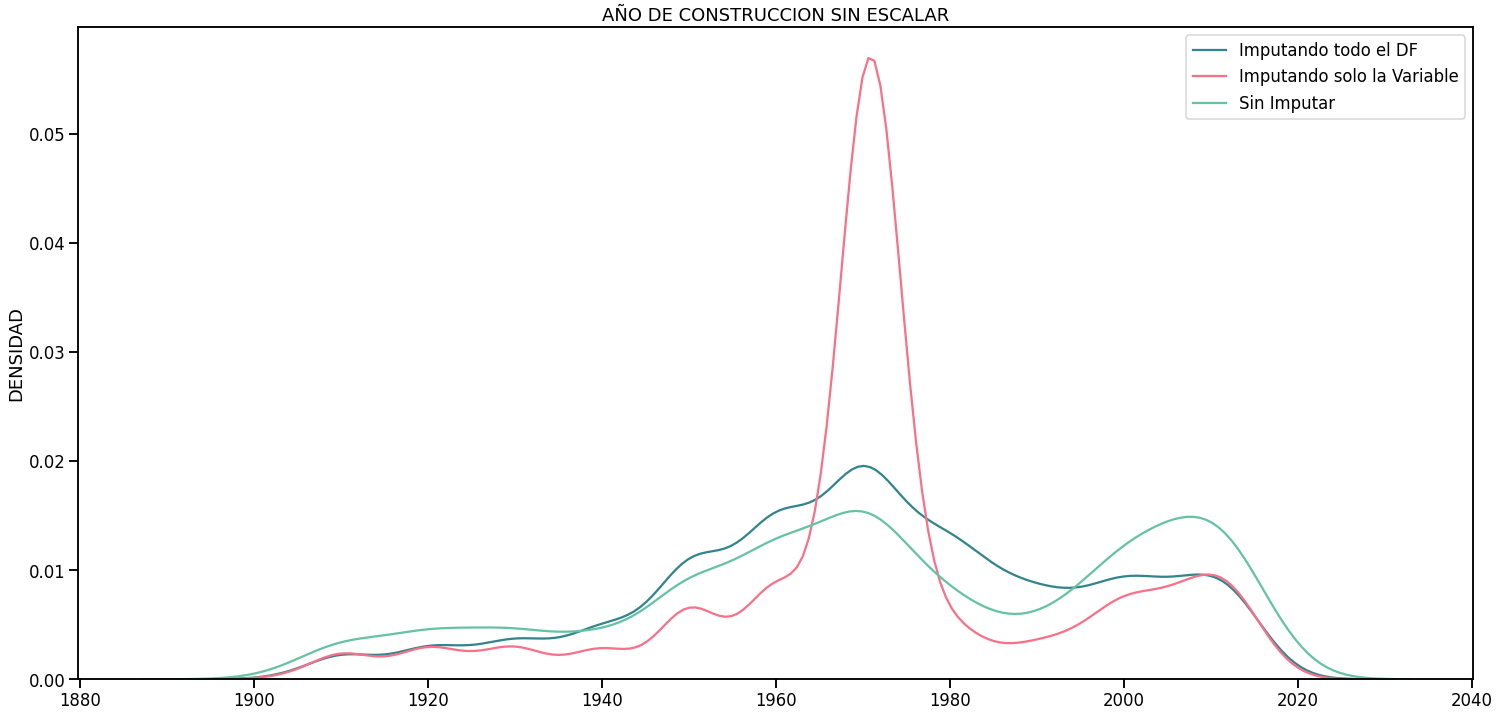

In [17]:
#Year Built SIN ESCALAR:
fig = plt.figure(figsize=(25, 12))
melb_YBall = df_with_all.YearBuilt.to_frame()
melb_YBinc = melb_data_mice.YearBuilt.to_frame()
melb_YBorig = df_encoding3.YearBuilt.to_frame()
ax1 = seaborn.kdeplot(data= melb_YBall, palette="crest", label="Imputando todo el DF") #matriz completa
ax2 = seaborn.kdeplot(data= melb_YBinc, palette="husl", label= "Imputando solo la Variable")#matriz incompleta
ax3 = seaborn.kdeplot(data= melb_YBorig , palette='Set2', label= "Sin Imputar")#matriz original
plt.legend()
plt.xlabel("")
plt.ylabel("DENSIDAD")
plt.title('AÑO DE CONSTRUCCION SIN ESCALAR')
plt.show()

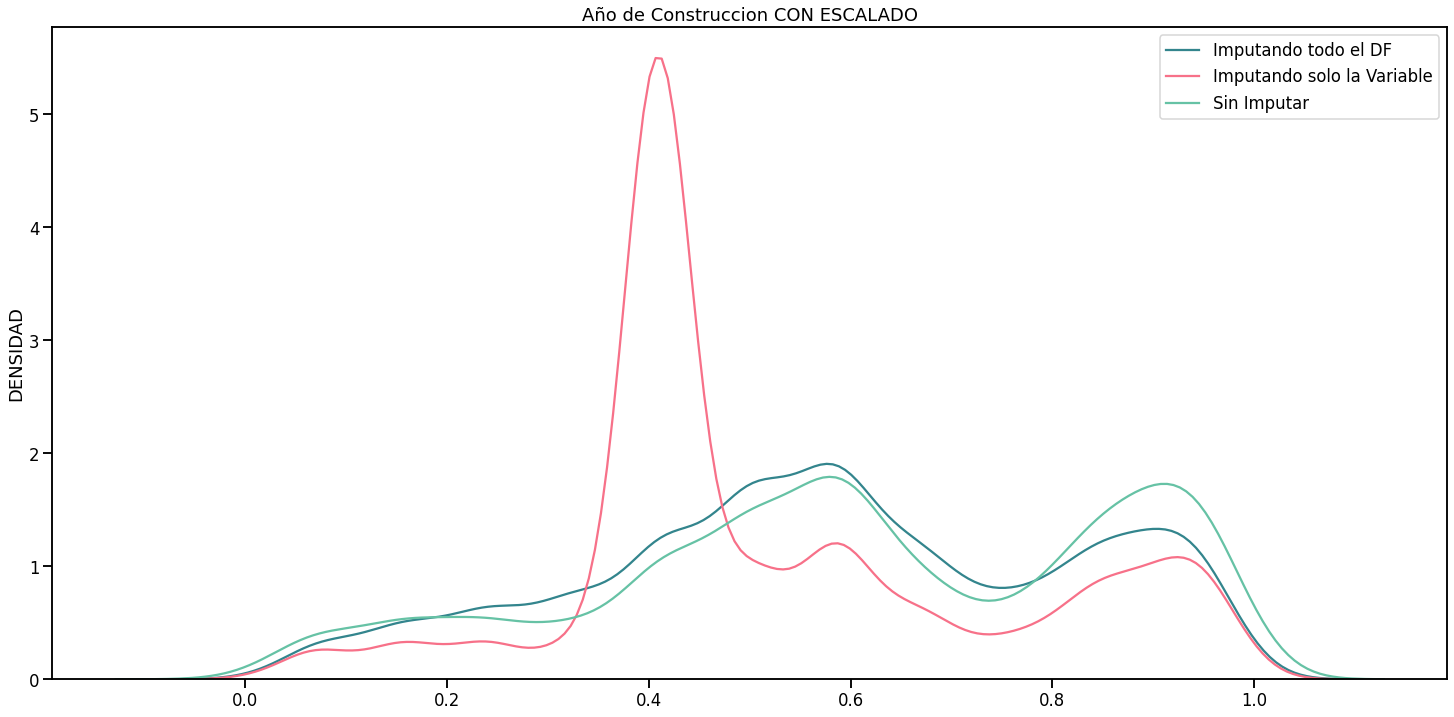

In [18]:
#Year Built ESCALADO:
fig = plt.figure(figsize=(25, 12))
melb_YBall_ESC =df_with_all_2.YearBuilt.to_frame()
melb_YBinc_ESC = melb_data_mice_ESC.YearBuilt.to_frame()
melb_YBorig = melb_df3.YearBuilt.to_frame()
ax1 = seaborn.kdeplot(data= melb_YBall_ESC, palette="crest", label="Imputando todo el DF") #matriz completa
ax2 = seaborn.kdeplot(data= melb_YBinc_ESC, palette="husl", label= "Imputando solo la Variable") #matriz incompleta
ax3 = seaborn.kdeplot(data= melb_YBorig , palette='Set2', label= "Sin Imputar")#matriz original
plt.legend()
plt.xlabel("")
plt.ylabel("DENSIDAD")
plt.title('Año de Construccion CON ESCALADO')
plt.show()

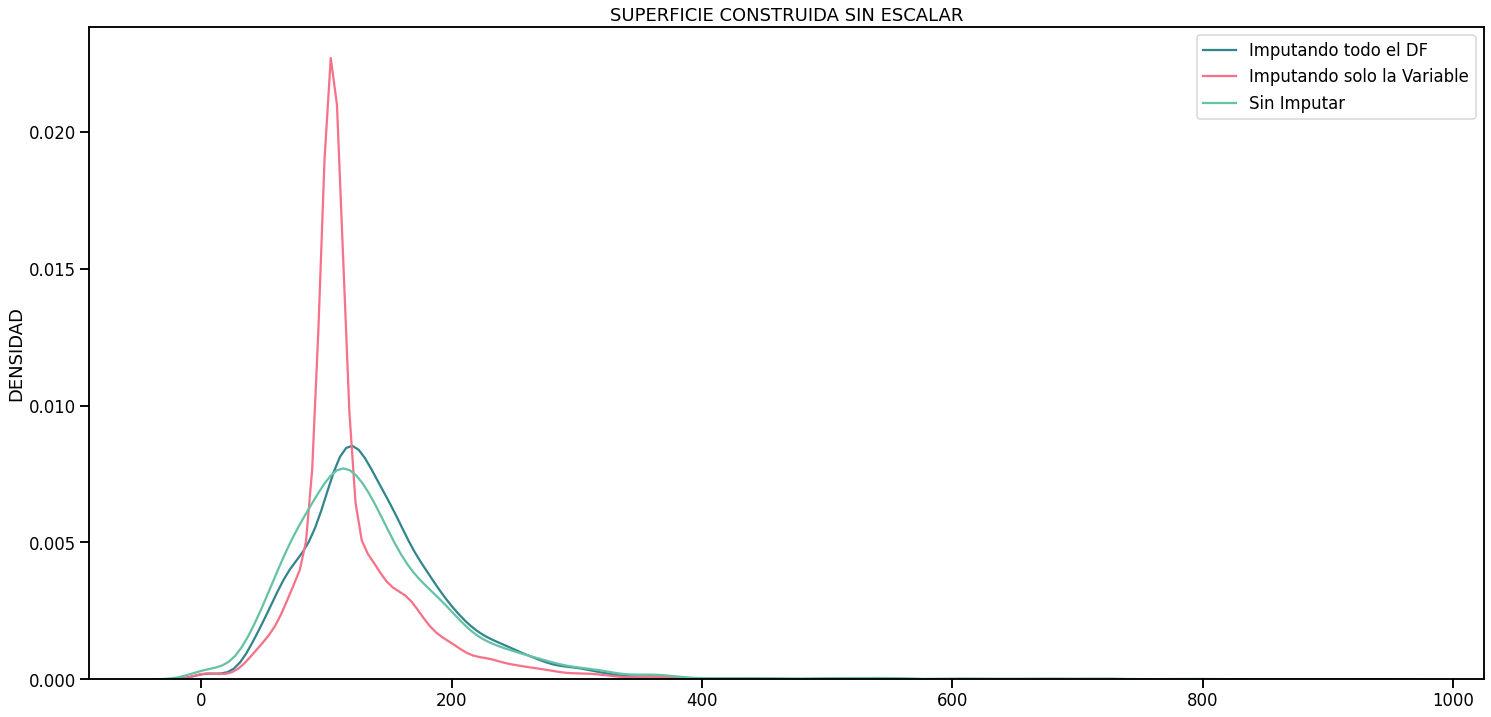

In [19]:
#Building Area SIN ESCALAR:
fig = plt.figure(figsize=(25, 12))
melb_BAall = df_with_all.BuildingArea.to_frame()
melb_BAinc = melb_data_mice.BuildingArea.to_frame()
melb_BAorig = df_encoding3.BuildingArea.to_frame()
ax1 = seaborn.kdeplot(data= melb_BAall, palette="crest", label="Imputando todo el DF") #matriz completa
ax2 = seaborn.kdeplot(data= melb_BAinc, palette="husl", label= "Imputando solo la Variable")#matriz incompleta
ax3 = seaborn.kdeplot(data= melb_BAorig , palette='Set2', label= "Sin Imputar")#matriz original
plt.legend()
plt.xlabel("")
plt.ylabel("DENSIDAD")
plt.title('SUPERFICIE CONSTRUIDA SIN ESCALAR')
plt.show()

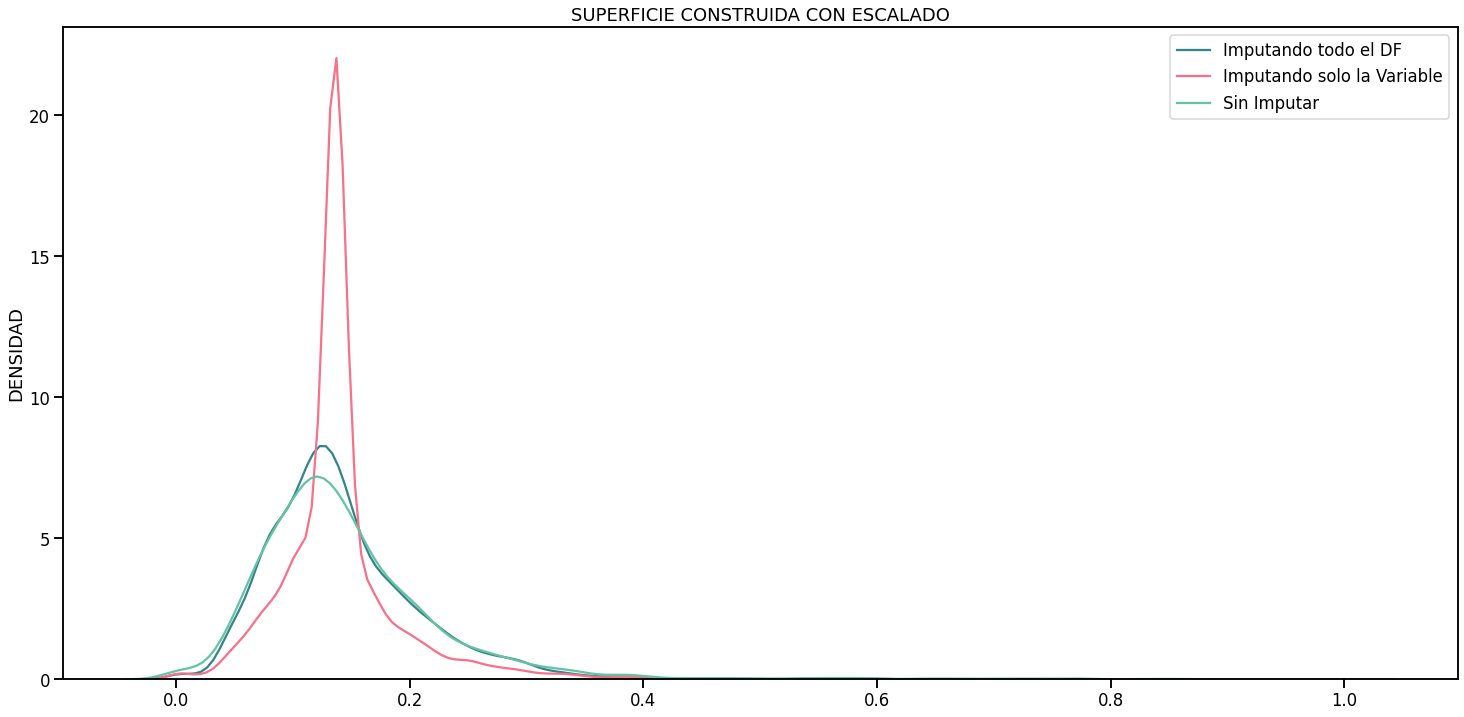

In [20]:
#Building Area ESCALADO:
fig = plt.figure(figsize=(25, 12))
melb_BAall_ESC =df_with_all_2.BuildingArea.to_frame()
melb_BAinc_ESC = melb_data_mice_ESC.BuildingArea.to_frame()
melb_BAorig = melb_df3.BuildingArea.to_frame()
ax1 = seaborn.kdeplot(data= melb_BAall_ESC, palette="crest", label="Imputando todo el DF") #matriz completa
ax2 = seaborn.kdeplot(data= melb_BAinc_ESC, palette="husl", label= "Imputando solo la Variable")#matriz incompleta
ax3 = seaborn.kdeplot(data= melb_BAorig , palette='Set2', label= "Sin Imputar")#matriz original
plt.legend()
plt.xlabel("")
plt.ylabel("DENSIDAD")
plt.title('SUPERFICIE CONSTRUIDA CON ESCALADO')
plt.show()

Comparando los graficos obtenidos podemos observar que imputando el Df completo se asemeja mejor la distribucion original.


En el caso de la variable Year Built, al imputar solo la variable, el escalado parace ser contraproducente, ya que el maximo de la distribucion de densidad luego de la imputacion se desplaza en realcion a la curva original.
Sin embargo, imputando todo el Df con escalado se consigue asemejar mas a la distribucion original, ya que aparecen bien reflejados los dos maximos locales que se tienen en la curva original, tambien esta claramente marcado el minimo local entre esos dos maximos. Al imputar sin escalar estas ondulaciones caracteristicas aparecen demasiado suavisadas o imperceptibles.

En la variable Building Area se observa que, cuando se imputa solo la variables se genera un desvio del maximo ya sea con escalado (hacia valores mayores) o sin escalado (hacia valores menores). Este mismo desvio aparece, aunque menos marcado, si imputamos toda la matriz sin escalar. 

En este sentido el escalado ayuda a asemejar mejor la distribucion original al imputar toda la matriz.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [21]:
#Utilizamos la matriz escalada e imputada completa.
melb_df_dim= df_with_all_2.copy (deep=True)

In [22]:
#Antes de realizar la reduccion, verificamos no tener Nan en el Df.
melb_df_dim.isna().sum()

Price                            0
Postcode                         0
Landsize                         0
BuildingArea                     0
YearBuilt                        0
zipcode                          0
airbnb_price_mean                0
airbnb_record_count              0
airbnb_weekly_price_mean         0
airbnb_monthly_price_mean        0
x0_h                             0
x0_t                             0
x0_u                             0
x1_Eastern Metropolitan          0
x1_Eastern Victoria              0
x1_Northern Metropolitan         0
x1_Northern Victoria             0
x1_South-Eastern Metropolitan    0
x1_Southern Metropolitan         0
x1_Western Metropolitan          0
x1_Western Victoria              0
x0_1                             0
x0_2                             0
x0_3                             0
x0_4                             0
x0_5                             0
x0_6                             0
x0_7                             0
x0_8                

In [23]:
from sklearn.decomposition import PCA

n = min(20, melb_df_dim.shape[0])
pca = PCA(n_components=n)
pca.fit(melb_df_dim)
proyected_features = pca.transform(melb_df_dim)
proyected_features.shape

(12253, 20)

In [24]:
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)
print("Explained variance ratio acumulation")
print(pca.explained_variance_ratio_.cumsum())

Explained variance: 
[0.80652527 0.44227542 0.30204573 0.29508143 0.25465346 0.23720498
 0.14435243 0.13152028 0.11341    0.10476276 0.07982825 0.06084218
 0.05192761 0.04762219 0.03924284 0.03416355 0.03172388 0.02413425
 0.0145487  0.01122741]
Explained variance ratio
[0.2459985  0.13489855 0.09212706 0.09000287 0.07767193 0.07234996
 0.04402897 0.04011504 0.03459122 0.03195372 0.02434844 0.01855749
 0.01583845 0.01452526 0.01196947 0.01042023 0.00967611 0.00736119
 0.0044375  0.00342448]
Explained variance ratio acumulation
[0.2459985  0.38089706 0.47302411 0.56302698 0.64069891 0.71304887
 0.75707784 0.79719288 0.8317841  0.86373782 0.88808626 0.90664375
 0.9224822  0.93700746 0.94897693 0.95939717 0.96907328 0.97643447
 0.98087197 0.98429645]


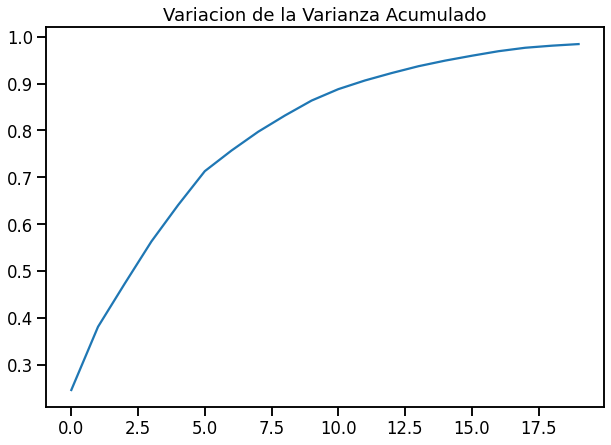

In [25]:
fig = plt.figure(figsize=(10, 7))
var= pca.explained_variance_ratio_.cumsum()
plt.plot(var)
plt.title("Variacion de la Varianza Acumulado")
plt.show()

Observando los valores de la variabilidad de la varianza decidimos tomar los dos primeros, ya que estos explican el 38%.

In [26]:
melb_df_dim[['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]

In [27]:
melb_df_dim [:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0,pca1_scaled,pca2_scaled
0,0.632653,0.068577,0.020433,0.107181,0.146552,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831750,-0.638016
1,0.346939,0.068577,0.009454,0.185209,0.563793,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.382331,-0.254869
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.438697,-0.380668
3,0.388209,0.068577,0.018298,0.114191,0.293103,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486214,-0.694281
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.811773,-0.381115


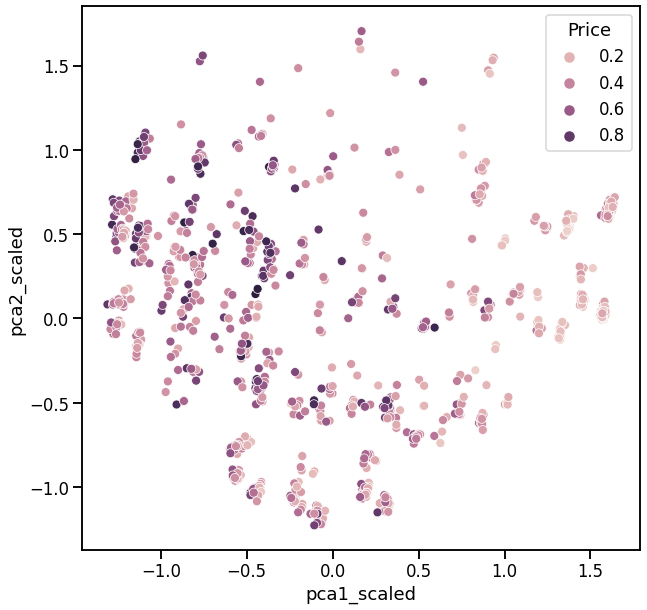

In [28]:
data = melb_df_dim[melb_df_dim.Price < 2000000].sample(1000)
fig = plt.figure(figsize=(10, 10))
seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='Price') 
plt.show()

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

A lo largo del Entregable fuimos realizando las operaciones a copias de los distintos Df de cada ejercicio, por lo cual mostraremos cada uno de los Df finales conseguidos:

In [29]:
#Ejercicio 1: Encoding
df_encoding_f=df_encoding3.copy(deep=True)
df_encoding_f[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,1480000.0,3067.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,850000.0,3067.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1600000.0,3067.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,941000.0,3067.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1876000.0,3067.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Ejercicio 2: Imputación por KNN
df_imput_f= df_with_all_2.copy(deep=True)
df_imput_f[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0
0,0.632653,0.068577,0.020433,0.107181,0.146552,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.346939,0.068577,0.009454,0.185209,0.563793,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.388209,0.068577,0.018298,0.114191,0.293103,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Ejercicio 3: PCA
df_PCA_f=melb_df_dim.copy(deep=True)
df_PCA_f[:5]

,Price,Postcode,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,x0_h,x0_t,x0_u,x1_Eastern Metropolitan,x1_Eastern Victoria,x1_Northern Metropolitan,x1_Northern Victoria,x1_South-Eastern Metropolitan,x1_Southern Metropolitan,x1_Western Metropolitan,x1_Western Victoria,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x0_7,x0_8,x0_10,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_8.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0,x2_5.0,x2_6.0,x2_7.0,x2_8.0,x2_9.0,x2_10.0,pca1_scaled,pca2_scaled
0,0.632653,0.068577,0.020433,0.107181,0.146552,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.831750,-0.638016
1,0.346939,0.068577,0.009454,0.185209,0.563793,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.382331,-0.254869
2,0.687075,0.068577,0.012097,0.151125,0.965517,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.438697,-0.380668
3,0.388209,0.068577,0.018298,0.114191,0.293103,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486214,-0.694281
4,0.812245,0.068577,0.024804,0.224009,0.068966,0.068577,0.121752,0.076077,0.214359,0.167762,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.811773,-0.381115


In [32]:
#DESCARGA DEL DF RESULTANTE:
Df_Final=df_PCA_f.copy(deep=True)

Df_Final.to_csv("Df_Final.csv", index=None)
#from google.colab import files
#files.download("Df_Final.csv") #descomentar para descargar

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
